# Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [5]:
data.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


# Пропуски, дубликаты и базовый контроль качества

In [6]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [7]:
# проверка на отрицательные значения
data.query('age < 0 | purchases < 0')

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [8]:
# проверка нереалистичных значений возраста
data.query('age > 100 | age < 18')

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [9]:
# проверка отсуствия дохода при наличии покупок
data.query('revenue == 0 & purchases > 0')

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В датасете около 5% значений возраста пустые, 1 строка полностью дублирует другую, 1 строка обладает отрицательным числом покупок, 2 строки имеют нереалистичный возраст и 1 нулевой доход при наличии покупок.

# Базовый EDA: группировки, агрегаты и частоты

In [10]:
data.value_counts('country')

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [11]:
group = data.groupby('country')
group['revenue'].agg(['sum','mean'])

,sum,mean
country,,
CN,2108,1054.000000
DE,8673,1445.500000
FR,8111,675.916667
RU,10271,790.076923
US,4459,557.375000


по численности доминируют Россия и Франция. По суммарным доходам лидируют Россия, Германия и Франция. По среднему доходу доминируют Германия и Китай.

Неожиданным стало, что Германия несмотря на вдвое меньшую численность чем у Франции, превзошла ее по сумме доходов.

# Визуализация данных в Matplotlib

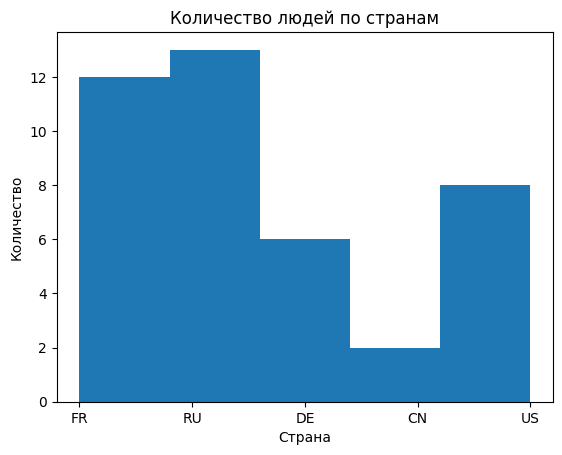

In [12]:
plt.hist(data['country'], bins = 5)
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.title('Количество людей по странам')
plt.show()

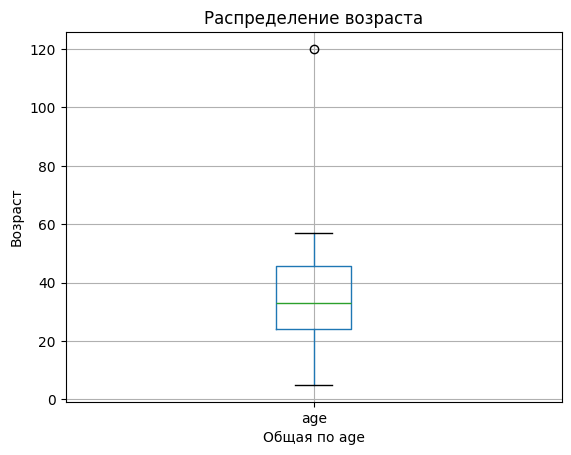

In [13]:
data.boxplot('age')
plt.xlabel("Общая по age")
plt.ylabel('Возраст')
plt.title('Распределение возраста')
plt.savefig('./figures/boxplot')
plt.show()

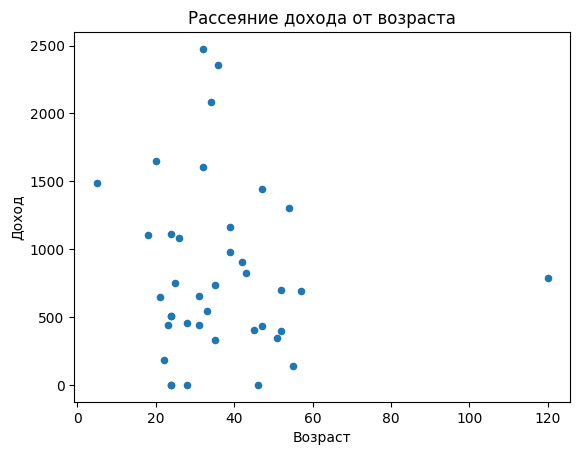

In [14]:
data.plot(kind='scatter', x='age', y='revenue')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Рассеяние дохода от возраста')
plt.show()